### ClassWork-Logistic Regression

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [33]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [34]:
# Create the logistic regression in Python

X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
lr= LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [37]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [38]:
y_test

22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64

In [39]:
lr.predict_proba(X_test)

array([[9.91609542e-01, 8.39045843e-03],
       [9.82686248e-01, 1.73137518e-02],
       [4.82945929e-02, 9.51705407e-01],
       [2.31228082e-01, 7.68771918e-01],
       [9.72097119e-01, 2.79028812e-02],
       [9.97314934e-01, 2.68506616e-03],
       [7.39280077e-02, 9.26071992e-01],
       [6.18376420e-02, 9.38162358e-01],
       [9.99411602e-01, 5.88398311e-04],
       [2.11035601e-01, 7.88964399e-01]])

<Axes: xlabel='Predicted', ylabel='Actual'>

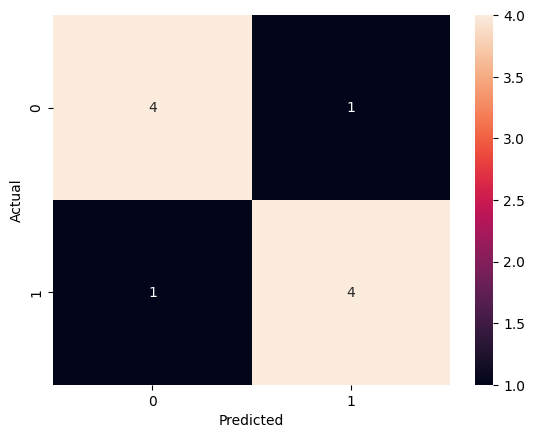

In [40]:
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

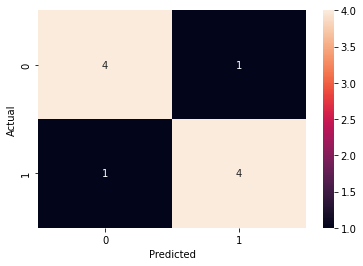

#### ClassWork
Do the same without "Work Experience" and compare both using metrics

In [41]:
X = df[['gmat', 'gpa']]
y = df['admitted']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
lr= LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [44]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [45]:
y_test

22    0
20    1
25    1
4     0
10    0
15    0
28    1
11    1
18    0
29    1
Name: admitted, dtype: int64

In [46]:
lr.predict_proba(X_test)

array([[0.99732248, 0.00267752],
       [0.83861302, 0.16138698],
       [0.45011727, 0.54988273],
       [0.17069208, 0.82930792],
       [0.9538442 , 0.0461558 ],
       [0.92574029, 0.07425971],
       [0.46633173, 0.53366827],
       [0.16611847, 0.83388153],
       [0.99637358, 0.00362642],
       [0.5422568 , 0.4577432 ]])

<Axes: xlabel='Predicted', ylabel='Actual'>

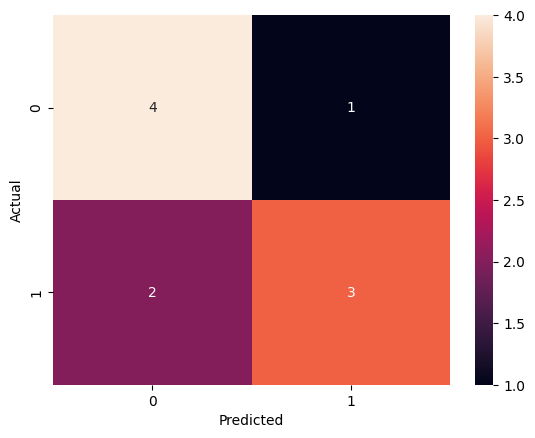

In [47]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

In [48]:
# Total number of actual negatives (sum of the first row)
actual_negatives = confusion_matrix.iloc[0].sum()

# Total number of actual positives (sum of the second row)
actual_positives = confusion_matrix.iloc[1].sum()

# Extracting the FP and FN values
FP = confusion_matrix.iloc[0, 1]
FN = confusion_matrix.iloc[1, 0]

# Calculating the percentages
FP_percentage = (FP / actual_negatives) * 100
FN_percentage = (FN / actual_positives) * 100

print(f"False Positive Percentage: {FP_percentage:.2f}%")
print(f"False Negative Percentage: {FN_percentage:.2f}%")

False Positive Percentage: 20.00%
False Negative Percentage: 40.00%
